In [1]:
#加载工具包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobike = pd.read_csv('mobike.csv')

In [3]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6427 non-null   int64  
 1   user_id            6427 non-null   int64  
 2   start_time         6427 non-null   object 
 3   end_time           6427 non-null   object 
 4   timeduration       6427 non-null   int64  
 5   bikeid             6427 non-null   int64  
 6   tripduration       6427 non-null   int64  
 7   from_station_id    6427 non-null   int64  
 8   from_station_name  6427 non-null   object 
 9   to_station_id      6427 non-null   int64  
 10  to_station_name    6427 non-null   object 
 11  usertype           6427 non-null   object 
 12  gender             5938 non-null   object 
 13  birthyear          5956 non-null   float64
 14  age                6427 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 753.3+ KB


In [7]:
mobike.head(10)

,Unnamed: 0,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
1,603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
2,109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
3,428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
4,395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40
5,73632,21068843,10/6/2018 12:04,10/6/2018 12:17,12,2173,772,321,Wabash Ave & 9th St,134,Peoria St & Jackson Blvd,Subscriber,Male,1994.0,25
6,317778,21354901,10/29/2018 17:26,10/29/2018 17:35,8,1735,505,90,Millennium Park,255,Indiana Ave & Roosevelt Rd,Subscriber,Female,1971.0,48
7,371796,21417733,11/3/2018 16:32,11/3/2018 16:54,22,983,1347,31,Franklin St & Chicago Ave,315,Elston Ave & Wabansia Ave,Customer,NaN,NaN,
8,333577,21373047,10/31/2018 6:15,10/31/2018 6:29,13,2178,819,77,Clinton St & Madison St,331,Halsted St & Clybourn Ave (*),Subscriber,Male,1991.0,28
9,261523,21288683,10/23/2018 18:11,10/23/2018 18:14,3,3888,225,74,Kingsbury St & Erie St,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,30


In [8]:
# 删除对业务分析没有实际用处的值
mobike.drop(['Unnamed: 0','user_id','bikeid','from_station_id','to_station_id',
             'from_station_name','to_station_name'],axis=1,inplace=True)
mobike.head()

,start_time,end_time,timeduration,tripduration,usertype,gender,birthyear,age
0,11/14/2018 7:37,11/14/2018 7:44,7,436,Subscriber,Male,1982.0,37
1,12/18/2018 19:02,12/18/2018 19:10,7,445,Subscriber,Male,1988.0,31
2,10/9/2018 12:37,10/9/2018 12:55,18,1090,Customer,Male,1989.0,30
3,11/12/2018 12:30,11/12/2018 12:40,9,581,Subscriber,Female,1989.0,30
4,11/7/2018 7:29,11/7/2018 7:35,6,390,Subscriber,Male,1979.0,40


In [9]:
# 删除空值
mobike.isnull().sum()/len(mobike)

start_time      0.000000
end_time        0.000000
timeduration    0.000000
tripduration    0.000000
usertype        0.000000
gender          0.076085
birthyear       0.073285
age             0.000000
dtype: float64

In [10]:
mobike.dropna(inplace=True)
mobike.isnull().any()

start_time      False
end_time        False
timeduration    False
tripduration    False
usertype        False
gender          False
birthyear       False
age             False
dtype: bool

In [11]:
# 删除与实际情况不符的异常值
mobike.describe()

,timeduration,tripduration,birthyear
count,5938.000000,5938.000000,5938.000000
mean,10.806837,791.862243,1982.504715
std,8.464567,3334.022596,11.106755
min,0.000000,61.000000,1918.000000
25%,5.000000,337.250000,1977.000000
50%,8.000000,527.000000,1986.000000
75%,14.000000,856.000000,1991.000000
max,59.000000,233732.000000,2002.000000


In [12]:
mobike.dtypes
# 发现age本该是数值型变量

start_time       object
end_time         object
timeduration      int64
tripduration      int64
usertype         object
gender           object
birthyear       float64
age              object
dtype: object

In [13]:
mobike.age = pd.to_numeric(mobike.age)
mobike.dtypes

start_time       object
end_time         object
timeduration      int64
tripduration      int64
usertype         object
gender           object
birthyear       float64
age               int64
dtype: object

In [14]:
mobike.describe()
# 年龄101过大、tripduration过大

,timeduration,tripduration,birthyear,age
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,10.806837,791.862243,1982.504715,36.495285
std,8.464567,3334.022596,11.106755,11.106755
min,0.000000,61.000000,1918.000000,17.000000
25%,5.000000,337.250000,1977.000000,28.000000
50%,8.000000,527.000000,1986.000000,33.000000
75%,14.000000,856.000000,1991.000000,42.000000
max,59.000000,233732.000000,2002.000000,101.000000


In [15]:
df['tripduration'].quantile(.25)
IQR = df['tripduration'].quantile(.75) - df['tripduration'].quantile(.25)
Max = df['tripduration'].quantile(.75) + 1.5 * IQR
Min = df['tripduration'].min()

NameError: name 'df' is not defined

In [16]:
len(mobike[mobike.tripduration>5000])
mobike = mobike[(mobike.age<80) & (mobike.tripduration<=5000)]
mobike.describe()

,timeduration,tripduration,birthyear,age
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,10.657966,679.307119,1982.537797,36.462203
std,8.158206,526.060766,11.037259,11.037259
min,0.000000,61.000000,1940.000000,17.000000
25%,5.000000,336.750000,1977.000000,28.000000
50%,8.000000,525.000000,1986.000000,33.000000
75%,14.000000,846.250000,1991.000000,42.000000
max,59.000000,4899.000000,2002.000000,79.000000


In [17]:
# 处理时间数据，转换变量格式，以便进行计算
# 先处理时间数据，否则时间数据还是object，在get——dummies时也会被转化
mobike.start_time = pd.to_datetime(mobike.start_time)
mobike.end_time = pd.to_datetime(mobike.end_time)

In [18]:
# 将类别型变量转换成数字行变量
mobike = pd.get_dummies(mobike)
mobike.head()

,start_time,end_time,timeduration,tripduration,birthyear,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male
0,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,1982.0,37,0,1,0,1
1,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,1988.0,31,0,1,0,1
2,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,1989.0,30,1,0,0,1
3,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,1989.0,30,0,1,1,0
4,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,1979.0,40,0,1,0,1


In [19]:
# 相关性
mobike.columns = mobike.columns.str.lower()
mobike.head()

,start_time,end_time,timeduration,tripduration,birthyear,age,usertype_customer,usertype_subscriber,gender_female,gender_male
0,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,1982.0,37,0,1,0,1
1,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,1988.0,31,0,1,0,1
2,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,1989.0,30,1,0,0,1
3,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,1989.0,30,0,1,1,0
4,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,1979.0,40,0,1,0,1


In [20]:
mobike[['timeduration','tripduration','age','usertype_subscriber','gender_male']].corr()
# timeduration 和tripduration 强相关，模型中选其一即可

,timeduration,tripduration,age,usertype_subscriber,gender_male
timeduration,1.000000,0.929463,0.031558,-0.188221,-0.054500
tripduration,0.929463,1.000000,0.028558,-0.250622,-0.056631
age,0.031558,0.028558,1.000000,0.050092,0.073693
usertype_subscriber,-0.188221,-0.250622,0.050092,1.000000,0.016852
gender_male,-0.054500,-0.056631,0.073693,0.016852,1.000000


In [21]:
#选出合适的特征变量
x = mobike[['timeduration','age','usertype_subscriber','gender_male']]
# 数据标准化
from sklearn.preprocessing import scale
x = pd.DataFrame(scale(x))

x

,0,1,2,3
0,-0.448417,0.048730,0.18291,0.528724
1,-0.448417,-0.494930,0.18291,0.528724
2,0.900033,-0.585540,-5.46718,0.528724
3,-0.203244,-0.585540,0.18291,-1.891347
4,-0.571003,0.320559,0.18291,0.528724
...,...,...,...,...
5895,-0.448417,-0.041880,0.18291,-1.891347
5896,0.532274,-0.676149,0.18291,0.528724
5897,1.022620,-0.313710,0.18291,-1.891347
5898,-0.325830,-0.132490,0.18291,0.528724


In [22]:
# 1.模型建立
from sklearn import cluster

# 3类
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [23]:
# 2.可视化和groupby（）评估分群效果
# 提取标签，查看分类效果
mobike['cluster'] = model.labels_

mobike.head()

,start_time,end_time,timeduration,tripduration,birthyear,age,usertype_customer,usertype_subscriber,gender_female,gender_male,cluster
0,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,1982.0,37,0,1,0,1,1
1,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,1988.0,31,0,1,0,1,1
2,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,1989.0,30,1,0,0,1,2
3,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,1989.0,30,0,1,1,0,0
4,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,1979.0,40,0,1,0,1,1


<AxesSubplot:xlabel='gender_male', ylabel='usertype_subscriber'>

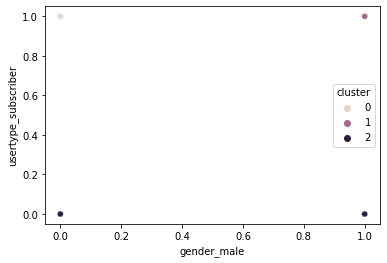

In [24]:
# 绘制散点图 查看分群结果
# 横坐标为age，纵坐标为usertype——subscriber，类别为分类类别
sns.scatterplot(x='gender_male',y='usertype_subscriber',hue='cluster',data=mobike)

In [25]:
# 3.轮廓系数评估模型效果
from sklearn import metrics

x_cluster = model.fit_predict(x) #个体与群的距离

score = metrics.silhouette_score(x,x_cluster) #评分越高，个体与群越接近；评分越低，个体与群越远
print('聚类个数为3时，轮廓系数：',score)

聚类个数为3时，轮廓系数： 0.47352012430664386


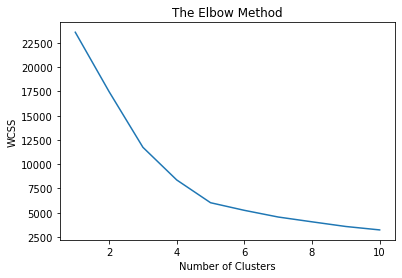

In [26]:
# 肘方法评估聚类个数
wcss =[]
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)#每类数据到其中心点的距离之和
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# 肘方法评估聚类个数：快速下降趋于平缓下降的转折点时聚类的最好方法
model = cluster.KMeans(n_clusters=5,random_state=10)
x_cluster = model.fit_predict(x)
score = metrics.silhouette_score(x,x_cluster)
print('聚类个数为5时，轮廓系数：',score)
#相比于个数是3时，有提高

聚类个数为5时，轮廓系数： 0.4878488782233543


In [28]:
centers = pd.DataFrame(model.cluster_centers_)
centers

,0,1,2,3
0,-0.196268,1.534257,0.18291,0.491559
1,-0.374736,-0.484343,0.18291,0.528724
2,-0.069266,-0.181078,0.18291,-1.891347
3,1.029038,-0.273860,-5.46718,-0.092132
4,2.020671,-0.092115,0.18291,0.319737


In [53]:
# 提取标签，查看分类结果
mobike['cluster'] = model.labels_
mobike['cluster'].value_counts(1)

3    0.348305
2    0.231356
1    0.222203
4    0.165763
0    0.032373
Name: cluster, dtype: float64

In [54]:
centers.columns = ['timeduration','age','usertype_subscriber','gender_male']
print(centers)

   timeduration       age  usertype_subscriber  gender_male
0     -0.196268  1.534257              0.18291     0.491559
1     -0.374736 -0.484343              0.18291     0.528724
2     -0.069266 -0.181078              0.18291    -1.891347
3      1.029038 -0.273860             -5.46718    -0.092132
4      2.020671 -0.092115              0.18291     0.319737


In [30]:
mobike.groupby(['cluster']).timeduration.describe()
#4群是骑行时间最长的用户

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1107.0,9.056911,4.965834,1.0,5.0,8.0,12.0,30.0
1,2850.0,7.601053,4.041874,0.0,4.0,7.0,10.0,18.0
2,1173.0,10.092924,6.189201,1.0,5.0,9.0,14.0,28.0
3,191.0,19.052356,13.126806,0.0,8.0,16.0,27.0,59.0
4,579.0,27.141623,8.374908,17.0,21.0,25.0,32.0,59.0


In [31]:
mobike.groupby(['cluster']).tripduration.describe()
#4群是骑行路程较长的用户

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1107.0,572.817525,298.445022,80.0,352.0,513.0,751.5,1809.0
1,2850.0,490.920351,278.895750,74.0,294.0,437.0,654.0,4515.0
2,1173.0,637.494459,381.626481,61.0,359.0,541.0,843.0,3692.0
3,191.0,1400.052356,1094.904066,236.0,573.0,1040.0,1885.0,4899.0
4,579.0,1657.148532,501.412692,1026.0,1266.5,1531.0,1940.5,3583.0


In [32]:
mobike.groupby(['cluster']).usertype_subscriber.describe()
#3群是非订阅的用户，其他是订阅用户

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1107.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,2850.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1173.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,579.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [33]:
mobike.groupby(['cluster']).gender_male.describe()
#2群是纯女性用户，1群是纯男性用户，其他是男女都有

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1107.0,0.984643,0.123023,0.0,1.0,1.0,1.0,1.0
1,2850.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,1173.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,191.0,0.743455,0.437874,0.0,0.0,1.0,1.0,1.0
4,579.0,0.913644,0.281132,0.0,1.0,1.0,1.0,1.0


In [34]:
mobike.groupby(['cluster']).age.describe()
#0群为较为年长用户

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1107.0,53.394761,7.349115,42.0,47.0,52.0,58.5,79.0
1,2850.0,31.116842,5.290046,17.0,27.0,31.0,35.0,43.0
2,1173.0,34.463768,9.711087,18.0,28.0,31.0,39.0,62.0
3,191.0,33.439791,10.494875,18.0,25.0,30.0,39.0,63.0
4,579.0,35.445596,8.509819,20.0,30.0,34.0,40.0,65.0


In [58]:
# 根据开始时间剥离出小时这个变量，再进行聚类
mobike['start_hour'] = mobike['start_time'].apply(lambda x:x.hour)
bins = [0,6,9,16,19,24]
mobike['start_level'] = pd.cut(mobike.start_hour,bins,right=False)
mobike['start_level'].value_counts(1)
# 大部分是在6-9和16-19的通勤时间骑车

[9, 16)     0.326441
[16, 19)    0.305424
[6, 9)      0.225085
[19, 24)    0.116610
[0, 6)      0.026441
Name: start_level, dtype: float64

In [45]:
mobike =pd.get_dummies(mobike)
mobike.head()

,start_time,end_time,timeduration,tripduration,birthyear,age,usertype_customer,usertype_subscriber,gender_female,gender_male,cluster,start_hour,"start_level_[0, 6)","start_level_[6, 9)","start_level_[9, 16)","start_level_[16, 19)","start_level_[19, 24)"
0,2018-11-14 07:37:00,2018-11-14 07:44:00,7,436,1982.0,37,0,1,0,1,1,7,0,1,0,0,0
1,2018-12-18 19:02:00,2018-12-18 19:10:00,7,445,1988.0,31,0,1,0,1,1,19,0,0,0,0,1
2,2018-10-09 12:37:00,2018-10-09 12:55:00,18,1090,1989.0,30,1,0,0,1,3,12,0,0,1,0,0
3,2018-11-12 12:30:00,2018-11-12 12:40:00,9,581,1989.0,30,0,1,1,0,2,12,0,0,1,0,0
4,2018-11-07 07:29:00,2018-11-07 07:35:00,6,390,1979.0,40,0,1,0,1,1,7,0,1,0,0,0


In [46]:
mobike[['timeduration','age','start_level_[6, 9)','start_level_[16, 19)','usertype_subscriber','gender_male']].corr()

,timeduration,age,"start_level_[6, 9)","start_level_[16, 19)",usertype_subscriber,gender_male
timeduration,1.000000,0.031558,-0.025710,0.038946,-0.188221,-0.054500
age,0.031558,1.000000,0.068588,-0.020403,0.050092,0.073693
"start_level_[6, 9)",-0.025710,0.068588,1.000000,-0.357386,0.059598,0.025668
"start_level_[16, 19)",0.038946,-0.020403,-0.357386,1.000000,0.004857,0.002397
usertype_subscriber,-0.188221,0.050092,0.059598,0.004857,1.000000,0.016852
gender_male,-0.054500,0.073693,0.025668,0.002397,0.016852,1.000000


In [48]:
x = mobike[['timeduration','age','start_level_[6, 9)','start_level_[16, 19)','usertype_subscriber','gender_male']]
#数据标准化
from sklearn.preprocessing import scale
x = pd.DataFrame(scale(x))

In [ ]:
#肘方法评估聚类个数k

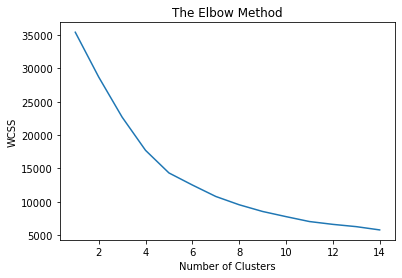

In [51]:
wcss = []
for i in range(1,15):
    kmeans = cluster.KMeans(n_clusters = i,init = 'k-means++',random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #每类数据到其中心点的距离之和
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# 肘方法评估聚类个数：快速下降趋于平缓下降的转折点时聚类的最好方法
model = cluster.KMeans(n_clusters=5,random_state=10)
x_cluster = model.fit_predict(x)
score = metrics.silhouette_score(x,x_cluster)
print('聚类个数为5时，轮廓系数：',score)
#相比于个数是3时，有提高

聚类个数为5时，轮廓系数： 0.3874598850383234


In [55]:
centers = pd.DataFrame(model.cluster_centers_)
# 提取标签，查看分类结果
mobike['cluster'] = model.labels_
mobike['cluster'].value_counts(1)

3    0.348305
2    0.231356
1    0.222203
4    0.165763
0    0.032373
Name: cluster, dtype: float64

In [56]:
centers.columns = ['timeduration','age','start_level_[6,9)','start_level_[16,19)','usertype_subscriber','gender_male']
print(centers)

   timeduration       age  start_level_[6,9)  start_level_[16,19)  \
0      1.029038 -0.273860          -0.325831            -0.026553   
1     -0.056533  0.126484           1.855471            -0.663119   
2      0.026751  0.000670          -0.538947             1.508025   
3     -0.104280  0.012530          -0.538947            -0.663119   
4      0.056594 -0.143330          -0.538947             0.182695   

   usertype_subscriber  gender_male  
0             -5.46718    -0.092132  
1              0.18291     0.045079  
2              0.18291     0.528724  
3              0.18291     0.528724  
4              0.18291    -1.891347  


In [ ]:
# 0群是非订阅用户，骑行时间长，可能是临时性骑车需求的用户，占比最小为3.2%
# 1群是6-9时骑车，即上班通勤的用户，占比22%；
# 2群是16-19时骑车，即下班通勤的用户，占比23%；
# 3群占比最高，为非上班高峰时段用户，占比35%
# 4群是女性用户，占比16%；

In [66]:
mobike[mobike.cluster==3].start_level.value_counts(1)

[9, 16)     0.696350
[19, 24)    0.247202
[0, 6)      0.056448
[6, 9)      0.000000
[16, 19)    0.000000
Name: start_level, dtype: float64

In [82]:
mobike[mobike.cluster==1].gender_male.value_counts(1)

1    0.800153
0    0.199847
Name: gender_male, dtype: float64